# **PROJECT PROPOSAL**

### INTRODUCTION

Statistics and data science are interrelated fields that focus on the collection, analysis, interpretation, presentation, and organization of data. By using statistical methods and models, data science is often used to extract valuable insights from voluminous data sets. These insights can be used to drive decision-making, strategies, and understanding of more complex systems.

In this project, we will be focusing on a dataset called "Top Spotify Songs 2023" available on KAGGLE. This dataset holds information on various Spotify songs, their artists, where they rank, and various other features like the year of release, tempo, energy, and danceability. Spotify is one of the world's leading music streaming service providers, with over 345 million users, including 155 million subscribers, across 178 countries.

#### Question: "Does the danceability and energy of a song contribute to its popularity on Spotify?"

This question allows us to assess two random variables of interest – *danceability and energy*, against the popularity measure (the response variable) on Spotify. As these features are continuous variables, they could be interpreted differently across the spectrum (lower, middle, high energy/danceability).

In terms of the **location parameter**, we will be using the *mean*. The mean will give us the average danceability and energy rating for a song on Spotify, which we can then compare to its popularity. 

This allows us to see average tendencies in the dataset. 

For the **scale parameter**, we'll use *standard deviation*. As the standard deviation measures the amount of variation or dispersion of a set of values, it would be useful in evaluating how much the energy and danceability of songs vary and how this variation affects song popularity. Therefore, by understanding the average rating (mean) and the spread of ratings (standard deviation), we can make a more informed assessment about the connection between a song's energy, danceability, and its popularity on Spotify.  

In conclusion, using basic statistical concepts like mean and standard deviation, we seek to better understand this dataset and uncover possibly hidden relationships, contributing to a more nuanced understanding of what traits may lead to a song's success on Spotify.

### PRELIMINARY RESULTS

In [2]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

spotify_original <- read_csv("https://drive.google.com/uc?export=download&id=1UQy2DuHB0IszFK4ZVgA20xDIWBHI4eTe")

spotify <- spotify_original %>%
    select("track_name", "streams", "danceability_%", "energy_%") %>%
    rename("danceability" = "danceability_%", "energy" = "energy_%") %>%
    mutate(streams = as.double(streams) / 1000000,
           danceability = as.integer(danceability), 
           energy = as.integer(energy)) %>%
    filter(if_all(everything(), ~!is.na(.)))

bottom_third_boundary_energy <- spotify %>%
    select(energy) %>%
    pull() %>%
    quantile(1/3)

top_third_boundary_energy <- spotify %>%
    select(energy) %>%
    pull() %>%
    quantile(2/3)

bottom_third_boundary_danceability <- spotify %>%
    select(danceability) %>%
    pull() %>%
    quantile(1/3)

top_third_boundary_danceability <- spotify %>%
    select(danceability) %>%
    pull() %>%
    quantile(2/3)

spotify_energy_categories <- spotify %>%
    mutate(energy = cut(energy, breaks = c(0, bottom_third_boundary_energy, top_third_boundary_energy, Inf), 
                                  labels = c("Low Energy", "Medium Energy", "High Energy")))

spotify_danceability_categories <- spotify %>%
    mutate(danceability = cut(danceability, breaks = c(0, bottom_third_boundary_danceability, top_third_boundary_danceability, Inf), 
                                  labels = c("Low Danceability", "Medium Danceability", "High Danceability")))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deez

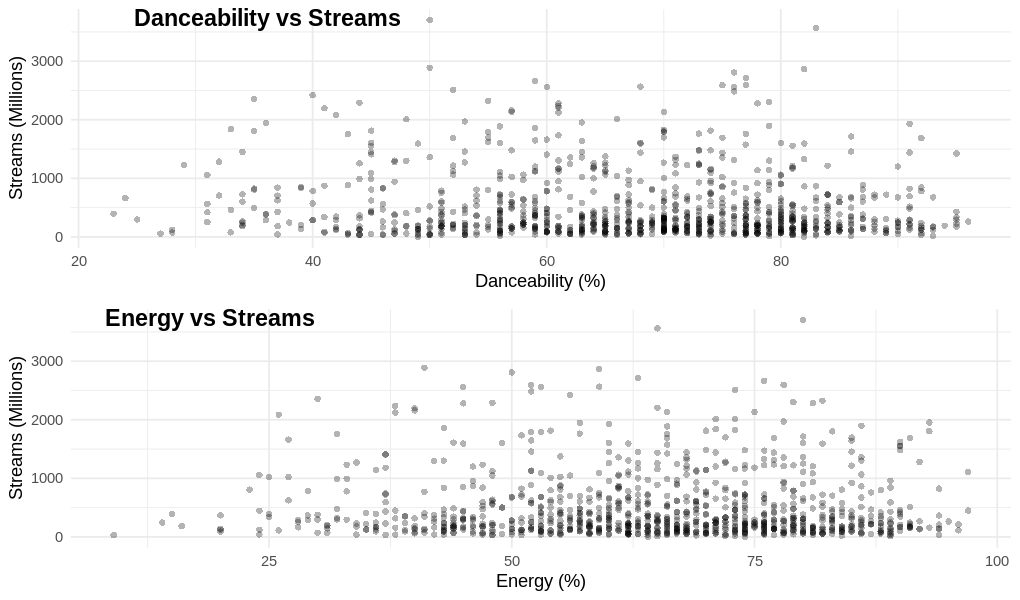

energy,mean_streams,standard_deviation_streams
<fct>,<dbl>,<dbl>
Low Energy,522.4069,585.9659
Medium Energy,530.1292,559.3322
High Energy,489.1972,555.1810


danceability,mean_streams,standard_deviation_streams
<fct>,<dbl>,<dbl>
Low Danceability,604.6125,640.7440
Medium Danceability,476.7969,491.0402
High Danceability,455.9626,545.4188


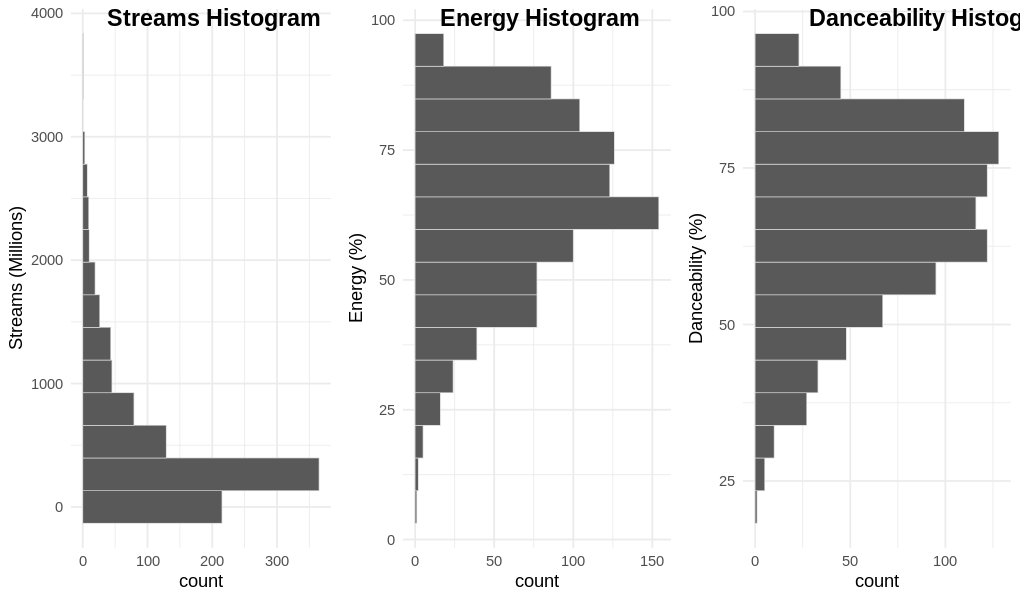

In [3]:
options(repr.plot.width = 8.5, repr.plot.height = 5)

spotify_vis_danceability_streams <- spotify %>%
    ggplot(aes(x = danceability, y = streams)) +
      geom_point(alpha = 0.3, shape = 16) +
      labs(x = "Danceability (%)", y = "Streams (Millions)") +
      theme_minimal()

spotify_vis_energy_streams <- spotify %>%
    ggplot(aes(x = energy, y = streams)) +
      geom_point(alpha = 0.3, shape = 16) +
      labs(x = "Energy (%)", y = "Streams (Millions)") +
      theme_minimal()

spotify_vis_energy <- spotify %>%
    ggplot(aes(y = energy)) +
        geom_histogram(bins = 15, color = "lightgray", linewidth = 0.2) +
        ylab("Energy (%)") +
        theme_minimal()

spotify_vis_danceability <- spotify %>%
    ggplot(aes(y = danceability)) +
        geom_histogram(bins = 15, color = "lightgray", linewidth = 0.2) +
        ylab("Danceability (%)") +
        theme_minimal()

spotify_vis_streams <- spotify %>%
    ggplot(aes(y = streams)) +
        geom_histogram(bins = 15, color = "lightgray", linewidth = 0.2) +
        ylab("Streams (Millions)") +
        theme_minimal()

combined_plot_scatter <- plot_grid(spotify_vis_danceability_streams, spotify_vis_energy_streams, 
                                   labels = c("Danceability vs Streams", "Energy vs Streams"), ncol = 1)

combined_plot_hist <- plot_grid(spotify_vis_streams, spotify_vis_energy, spotify_vis_danceability,
                                labels = c("Streams Histogram", "Energy Histogram", 
                                           "Danceability Histogram"), ncol = 3)

streams_energy <- spotify_energy_categories %>%
    group_by(energy) %>%
    summarize(mean_streams = mean(streams),
              standard_deviation_streams = sd(streams))

streams_danceability <- spotify_danceability_categories %>%
    group_by(danceability) %>%
    summarize(mean_streams = mean(streams),
              standard_deviation_streams = sd(streams))

combined_plot_scatter

combined_plot_hist

streams_energy

streams_danceability



### METHODS: PLAN

### Methods: Plan

After cleaning the dataset and identifying the explanaory variables (dancibility & energy) we want to focus on, we aim to examine their association with the streaming count. The sample size of the dataset in our report contains 953 observarions and is considered large enough to make the central limited theorem applicable. As seen in the histograms, the shape and range of energy and danceabiliry distribution are similar. The symmetric distribution enables us to conduct a robust hypothesis test to make statistical inferences about the streaming of the whole song population. However, **we cannot conclude that there is no difference between the danceability and energy of a song contributing to its popularity on Spotify.This is because our comparison is based on only one sample which cannot generalize to the whole population.**

To address the limitations, we will use the **bootstrap sampling to generate additional samples by resampling our data with replacement**. This approach estimates the sampling distribution without strong assumptions, providing more accurate confidence intervals, especially with smaller sample sizes or non-normal data.

**The significance level (α) is a predefined maximum probability of commuting type I error we’re willing to accept. By default, we set it to be 5%.**

Then, we will **conduct hypothesis tests with a significant level of 5%(by default) to assess the statistical differences in streaming count between the metrics of danceability and energy.** Specifically, because we don't know the population standard deviation, we will employ the **two-sample t-test to compare the means of each group.**. Additionally, we will **conduct a 95% confidence interval** to provide a measure of uncertainty, offering stakeholders a range of likely values for the true population parameter.

- **What do we expect to find?** 

We expect to find that songs with medium energy and low danceability are more popular than other types of songs.

- **What impact could such findings have?**

  - Music Production: Musicians and artists will create more songs with medium energy and low danceability to make them popular.
  - Music Recommendations: Streaming platforms can create playlists like 'The most popular type of songs' based on our data.
- **What future questions could this lead to?**

  - Other Metrics of songs
  
  Do other musical elements, such as BPM, mode and key have impact on the popularity of songs?

  - Music trend
  
  Will songs have a noticable change in danceability and energy to cater to listeners' taste?





### REFERENCES